In [1]:
   from google.colab import drive
   drive.flush_and_unmount()
   print('All changes made in this colab session should now be visible in Drive.')

Drive not mounted, so nothing to flush and unmount.
All changes made in this colab session should now be visible in Drive.


In [2]:
from google.colab import drive
drive.mount('/content/drive')
import os

# List files and folders in MyDrive
print(os.listdir('/content/drive/MyDrive'))


Mounted at /content/drive
['Getting started.pdf', 'SATStudentScoreReport_1656581273308.pdf', 'gait.rar', '1ms22cs013.pdf', 'Colab Notebooks', 'aiml_gait1.docx', 'aiml.hackathon.final.pptx', 'CASIA_Dataset_A.zip', 'CASIA_Processed_Images', 'Untitled document.gdoc', 'CASIA_CNN_Model.h5', 'DBS47- ADITYA JK.pdf']


In [ ]:
import zipfile
casia_zip_path = '/content/drive/MyDrive/CASIA_Dataset_A.zip'
casia_extract_path = '/content/CASIA_Dataset_A'

with zipfile.ZipFile(casia_zip_path, 'r') as zip_ref:
    zip_ref.extractall(casia_extract_path)

print(f"CASIA Dataset extracted to: {casia_extract_path}")


CASIA Dataset extracted to: /content/CASIA_Dataset_A


In [ ]:
!apt-get install unrar -y
import os
gei_rar_path = '/content/drive/MyDrive/gait.rar'
gei_extract_path = '/content/gait'

os.makedirs(gei_extract_path, exist_ok=True)
!unrar x "{gei_rar_path}" "{gei_extract_path}" > /dev/null

print(f"GEI Dataset extracted to: {gei_extract_path}")


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unrar is already the newest version (1:6.1.5-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.

Cannot open /content/drive/MyDrive/gait.rar
No such file or directoryGEI Dataset extracted to: /content/gait


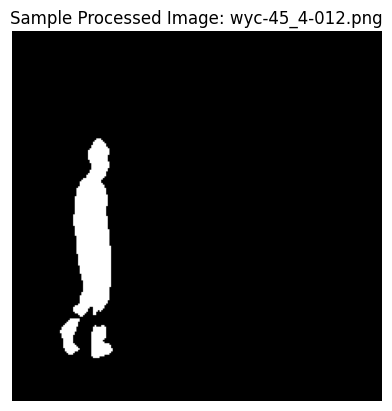

In [ ]:
import os
import random
import cv2
import matplotlib.pyplot as plt

# Path to the processed images folder
processed_images_path = '/content/drive/MyDrive/CASIA_Processed_Images'

# Get all image file paths in the processed images folder
processed_image_paths = []
for root, _, files in os.walk(processed_images_path):
    for file in files:
        if file.endswith(('.png', '.jpg', '.jpeg')):
            processed_image_paths.append(os.path.join(root, file))

# Select a random image from the processed images folder
random_image_path = random.choice(processed_image_paths)

# Load the selected image
image = cv2.imread(random_image_path, cv2.IMREAD_GRAYSCALE)

# Display the image using matplotlib
plt.imshow(image, cmap='gray')
plt.title(f"Sample Processed Image: {os.path.basename(random_image_path)}")
plt.axis('off')  # Hide the axes
plt.show()


In [ ]:
import os
import cv2
import numpy as np

# Path to the CASIA dataset (root directory)
casia_path = '/content/CASIA_Dataset_A/GaitDatasetA-silh'

# Path to save the processed images in Google Drive
output_path = '/content/drive/MyDrive/CASIA_Processed_Images'
os.makedirs(output_path, exist_ok=True)

# Function to resize images
def resize_image(image, target_size=(224, 224)):
    # Resize image using INTER_LINEAR interpolation (common for resizing)
    resized_image = cv2.resize(image, target_size, interpolation=cv2.INTER_LINEAR)
    return resized_image

# List all image file paths recursively
image_paths = []
for root, _, files in os.walk(casia_path):
    for file in files:
        # Check for image file extensions
        if file.endswith(('.png', '.jpg', '.jpeg')):
            image_paths.append(os.path.join(root, file))

# Check if images were found
if len(image_paths) == 0:
    print("No images found in the dataset!")
else:
    print(f"Total images found: {len(image_paths)}")

    # Loop through all images, apply preprocessing, and save to output folder
    for i, image_path in enumerate(image_paths):
        # Load the image (grayscale for silhouette)
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

        if image is not None:
            # Step 1: Resize the image to a fixed size (224x224)
            resized_image = resize_image(image, target_size=(224, 224))

            # Step 2: Normalize the image: scale pixel values to the range [0, 1]
            normalized_image = resized_image.astype('float32') / 255.0

            # Step 3: Background Removal (thresholding)
            _, binary_image = cv2.threshold(normalized_image, 0.5, 1.0, cv2.THRESH_BINARY)

            # Step 4: Noise Reduction (Median Filtering)
            denoised_image = cv2.medianBlur((binary_image * 255).astype(np.uint8), 3)

            # Convert back to float32 for consistency
            processed_image = denoised_image.astype('float32') / 255.0

            # Convert normalized image back to uint8 for saving (multiply by 255)
            output_image = (processed_image * 255).astype(np.uint8)

            # Construct output path (preserving subfolder structure)
            relative_path = os.path.relpath(image_path, casia_path)
            output_image_path = os.path.join(output_path, relative_path)

            # Create any necessary subdirectories in the output path
            os.makedirs(os.path.dirname(output_image_path), exist_ok=True)

            # Save the processed image
            cv2.imwrite(output_image_path, output_image)

        # Optional: Print progress every 1000 images processed
        if i % 1000 == 0:
            print(f"Processed {i + 1} / {len(image_paths)} images")

    print("All images have been resized, normalized, background removed, and noise reduced.")


Total images found: 19135
Processed 1 / 19135 images


KeyboardInterrupt: 

In [ ]:
import cv2
import numpy as np # Import the numpy library with the alias 'np'

image = cv2.imread(random_image_path, cv2.IMREAD_GRAYSCALE)
print(f"Image shape: {image.shape}")
# Check if most of the image is black (background)
num_black_pixels = np.sum(image == 0)
total_pixels = image.size

# Percentage of black pixels in the image
black_pixel_percentage = (num_black_pixels / total_pixels) * 100
print(f"Percentage of black (background) pixels: {black_pixel_percentage:.2f}%")

Image shape: (224, 224)
Percentage of black (background) pixels: 95.77%


In [ ]:
import os

train_dir = '/content/drive/MyDrive/CASIA_Processed_Images/train'
val_dir = '/content/drive/MyDrive/CASIA_Processed_Images/val'

print("Train Directory Contents:")
for root, dirs, files in os.walk(train_dir):
    print(f"Directory: {root}, Number of files: {len(files)}")

print("\nValidation Directory Contents:")
for root, dirs, files in os.walk(val_dir):
    print(f"Directory: {root}, Number of files: {len(files)}")


Train Directory Contents:
Directory: /content/drive/MyDrive/CASIA_Processed_Images/train, Number of files: 0
Directory: /content/drive/MyDrive/CASIA_Processed_Images/train/class_1, Number of files: 142
Directory: /content/drive/MyDrive/CASIA_Processed_Images/train/class_2, Number of files: 320

Validation Directory Contents:
Directory: /content/drive/MyDrive/CASIA_Processed_Images/val, Number of files: 0
Directory: /content/drive/MyDrive/CASIA_Processed_Images/val/class_1, Number of files: 36
Directory: /content/drive/MyDrive/CASIA_Processed_Images/val/class_2, Number of files: 80


In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Source and target paths
processed_images_path = '/content/drive/MyDrive/CASIA_Processed_Images'
train_dir = os.path.join(processed_images_path, 'train')
val_dir = os.path.join(processed_images_path, 'val')

# Create train and val directories
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

# Define classes (e.g., based on angles or subject groups)
# Adjust these based on your actual classification logic
classes = {
    "class_1": ["00_2", "00_3", "00_4"],
    "class_2": ["45_1", "45_2", "45_3", "45_4"],
}

# Process each class
for cls, subfolders in classes.items():
    # Create subfolders for train and val
    os.makedirs(os.path.join(train_dir, cls), exist_ok=True)
    os.makedirs(os.path.join(val_dir, cls), exist_ok=True)

    # Collect images from specified subfolders
    images = []
    for subfolder in subfolders:
        subfolder_path = os.path.join(processed_images_path, "wq", subfolder)  # Adjust if needed
        if os.path.exists(subfolder_path):
            images.extend([os.path.join(subfolder_path, f) for f in os.listdir(subfolder_path) if f.endswith(('.png', '.jpg', '.jpeg'))])

    # Split into train and validation sets
    train_images, val_images = train_test_split(images, test_size=0.2, random_state=42)

    # Copy files to train and val directories
    for img_path in train_images:
        shutil.copy(img_path, os.path.join(train_dir, cls))
    for img_path in val_images:
        shutil.copy(img_path, os.path.join(val_dir, cls))

print("Dataset restructuring complete!")


KeyboardInterrupt: 

In [ ]:
# Print train directory contents
print("Train Directory Contents:")
for root, _, files in os.walk(train_dir):
    print(f"Directory: {root}, Number of files: {len(files)}")

# Print validation directory contents
print("\nValidation Directory Contents:")
for root, _, files in os.walk(val_dir):
    print(f"Directory: {root}, Number of files: {len(files)}")


Train Directory Contents:
Directory: /content/drive/MyDrive/CASIA_Processed_Images/train, Number of files: 0
Directory: /content/drive/MyDrive/CASIA_Processed_Images/train/class_1, Number of files: 142
Directory: /content/drive/MyDrive/CASIA_Processed_Images/train/class_2, Number of files: 320

Validation Directory Contents:
Directory: /content/drive/MyDrive/CASIA_Processed_Images/val, Number of files: 0
Directory: /content/drive/MyDrive/CASIA_Processed_Images/val/class_1, Number of files: 36
Directory: /content/drive/MyDrive/CASIA_Processed_Images/val/class_2, Number of files: 80


Dataset restructuring complete!
Found 462 images belonging to 2 classes.
Found 116 images belonging to 2 classes.


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,169,089 (42.61 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 75s 5s/step - accuracy: 0.6523 - loss: 0.7334 - val_accuracy: 0.6562 - val_loss: 0.6742
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 7s 220ms/step - accuracy: 0.6562 - loss: 0.7346 - val_accuracy: 0.6500 - val_loss: 0.5635
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 63s 4s/step - accuracy: 0.7117 - loss: 0.6219 - val_accuracy: 0.6667 - val_loss: 0.6050
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - accuracy: 0.6250 - loss: 0.6325 - val_accuracy: 0.8000 - val_loss: 0.4850
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 78s 4s/step - accuracy: 0.7232 - loss: 0.5717 - val_accuracy: 0.7917 - val_loss: 0.5555
Epoch 6/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 115ms/step - accuracy: 0.6562 - loss: 0.6373 - val_accuracy: 0.7500 - val_loss: 0.5068
Epoch 7/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 62s 4s/step - accuracy: 0.7255 - loss: 0.5663 - val_accuracy: 0.8125 - val_loss: 0.3925
Epoch 8/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7188 - loss: 0.6131 - val_accuracy: 0.6500 - val

Model saved successfully!


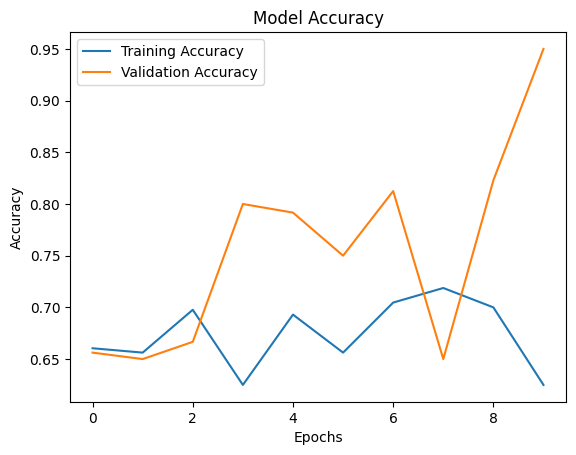

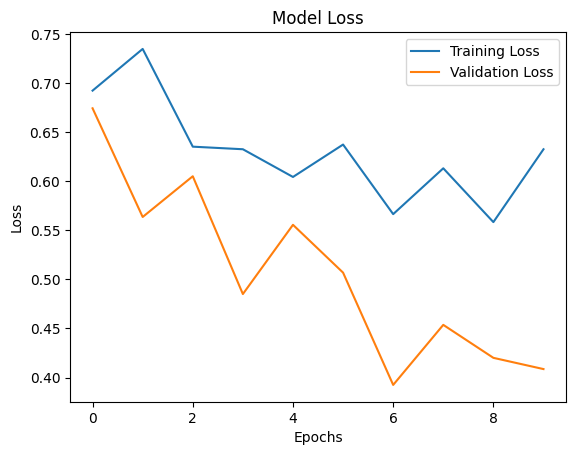

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import shutil

# Paths
processed_images_path = '/content/drive/MyDrive/CASIA_Processed_Images'
train_dir = os.path.join(processed_images_path, 'train')
val_dir = os.path.join(processed_images_path, 'val')

# Step 1: Restructure Dataset
# Define classes (e.g., classify based on certain subfolder names or logic)
classes = {
    "class_1": ["00_2", "00_3", "00_4"],  # Example: silhouettes for '00'
    "class_2": ["45_1", "45_2", "45_3", "45_4"],  # Example: silhouettes for '45'
}

# Create train and val directories
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

# Organize images
for cls, subfolders in classes.items():
    os.makedirs(os.path.join(train_dir, cls), exist_ok=True)
    os.makedirs(os.path.join(val_dir, cls), exist_ok=True)

    # Collect all images for the current class
    images = []
    for subfolder in subfolders:
        subfolder_path = os.path.join(processed_images_path, "wq", subfolder)  # Adjust if needed
        if os.path.exists(subfolder_path):
            images.extend([os.path.join(subfolder_path, f) for f in os.listdir(subfolder_path) if f.endswith(('.png', '.jpg', '.jpeg'))])

    # Split into train and validation sets
    train_images, val_images = train_test_split(images, test_size=0.2, random_state=42)

    # Copy files to the appropriate directories
    for img_path in train_images:
        shutil.copy(img_path, os.path.join(train_dir, cls))
    for img_path in val_images:
        shutil.copy(img_path, os.path.join(val_dir, cls))

print("Dataset restructuring complete!")

# Step 2: Set Up Image Data Generators
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

# Step 3: Build the Lightweight CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

# Step 4: Train the Model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_steps=val_generator.samples // val_generator.batch_size
)

# Step 5: Save the Model
model.save('/content/drive/MyDrive/CASIA_CNN_Model.h5')
print("Model saved successfully!")

# Step 6: Plot Training History (Optional)
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
# Save model
model.save('/content/drive/MyDrive/CASIA_CNN_Model.h5')
print("Model saved successfully!")


Model saved successfully!


In [ ]:
from tensorflow.keras.models import load_model

# Path to your saved model
model_path = '/content/drive/MyDrive/CASIA_CNN_Model.h5'

# Load the model
model = load_model(model_path)
print("Model loaded successfully!")


Model loaded successfully!


In [ ]:
for layer in model.layers:
    print(layer.name)


conv2d_3
max_pooling2d_3
conv2d_4
max_pooling2d_4
conv2d_5
max_pooling2d_5
flatten_1
dense_2
dropout_1
dense_3


In [ ]:
from tensorflow.keras.models import load_model
import numpy as np

# Reload the trained CNN model
model = load_model('/content/drive/MyDrive/CASIA_CNN_Model.h5')

# Create a dummy input tensor to ensure the model layers are initialized
dummy_input = np.zeros((1, 224, 224, 3))  # (batch_size, height, width, channels)

# Run a dummy pass through the model to initialize the model layers
_ = model.predict(dummy_input)  # This step is necessary to "call" the model and initialize all layers

# List all layers to confirm their structure and access the right layer
for i, layer in enumerate(model.layers):
    print(f"{i}: {layer.name}")

# Create the feature extractor by accessing the 'dense_2' layer (just before the final output layer)
feature_extractor = tf.keras.Model(inputs=model.input, outputs=model.get_layer('dense_2').output)

# Test feature extraction by extracting features from a sample batch
features_train = feature_extractor.predict(train_generator, steps=train_generator.samples // train_generator.batch_size)
features_val = feature_extractor.predict(val_generator, steps=val_generator.samples // val_generator.batch_size)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
0: conv2d_3
1: max_pooling2d_3
2: conv2d_4
3: max_pooling2d_4
4: conv2d_5
5: max_pooling2d_5
6: flatten_1
7: dense_2
8: dropout_1
9: dense_3


ValueError: The layer sequential_1 has never been called and thus has no defined input.

In [ ]:
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.layers import Input
import numpy as np

# Reload the trained CNN model
model = load_model('/content/drive/MyDrive/CASIA_CNN_Model.h5')

# Get the layers of the model
layers = [layer for layer in model.layers if isinstance(layer, tf.keras.layers.Layer)]

# Create a new model with input layers from the original model and the layers up to 'dense_2'
input_layer = Input(shape=(224, 224, 3))

# Add layers up to 'dense_2' manually
x = layers[0](input_layer)  # conv2d_3
x = layers[1](x)  # max_pooling2d_3
x = layers[2](x)  # conv2d_4
x = layers[3](x)  # max_pooling2d_4
x = layers[4](x)  # conv2d_5
x = layers[5](x)  # max_pooling2d_5
x = layers[6](x)  # flatten_1
x = layers[7](x)  # dense_2 (this is where we stop for feature extraction)

# Define the feature extractor model
feature_extractor = Model(inputs=input_layer, outputs=x)

# Test feature extraction by extracting features from a sample batch
features_train = feature_extractor.predict(train_generator, steps=train_generator.samples // train_generator.batch_size)
features_val = feature_extractor.predict(val_generator, steps=val_generator.samples // val_generator.batch_size)


14/14 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step


In [ ]:
# Flatten the features to pass them into a scoring model
flat_features_train = features_train.reshape(features_train.shape[0], -1)
flat_features_val = features_val.reshape(features_val.shape[0], -1)


In [ ]:
!pip install --upgrade tensorflow-hub  # Upgrade TensorFlow Hub

import tensorflow as tf
import tensorflow_hub as hub
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load MoveNet model from TensorFlow Hub
posenet_model = hub.load("https://tfhub.dev/google/movenet/singlepose/lightning/4")

# Path to the silhouette image (use the same folder as the one you're working with)
image_path = '/content/drive/MyDrive/CASIA_Processed_Images/sample_silhouette.jpg'

# Load the image using OpenCV
image = cv2.imread(image_path)

# Check if the image was loaded successfully
if image is None:
    print(f"Error: Could not load image from {image_path}. Check the file path and ensure the image exists.")
else:
    # Convert to RGB (MoveNet expects RGB images, OpenCV reads in BGR)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Resize the image to the required input size (MoveNet uses 192x192)
    input_image = cv2.resize(image_rgb, (192, 192))

    # Normalize the image to the [0, 1] range
    input_image = input_image / 255.0

    # Add batch dimension for the model
    input_image = np.expand_dims(input_image, axis=0)

    # Run MoveNet on the input image
    outputs = posenet_model(input_image)

    # Get the keypoints and their confidence scores
    keypoints = outputs['output_0'].numpy()  # This is the keypoint heatmap
    keypoints = np.squeeze(keypoints)

    # Visualizing the output
    # MoveNet gives 17 keypoints per person in the form [y, x, confidence_score]
    # Draw keypoints on the original image
    fig, ax = plt.subplots()
    ax.imshow(image_rgb)
    for i in range(keypoints.shape[0]):
        if keypoints[i][2] > 0.2:  # confidence threshold to filter out weak keypoints
            ax.scatter(keypoints[i][1], keypoints[i][0], marker='o', color='r')

    # Optional: Draw lines connecting the keypoints to visualize the pose skeleton
    # List of connected keypoints (adjust for MoveNet's keypoint order)
    pairs = [
        (0, 1), (1, 2), (2, 3), (3, 7),
        (0, 4), (4, 5), (5, 6), (6, 8),
        (9, 10), (11, 12), (11, 13), (13, 15),
        (12, 14), (14, 16)
    ]

    for pair in pairs:
        i, j = pair
        if keypoints[i][2] > 0.2 and keypoints[j][2] > 0.2:
            ax.plot([keypoints[i][1], keypoints[j][1]],
                    [keypoints[i][0], keypoints[j][0]], color='b', lw=2)

    plt.show()

Error: Could not load image from /content/drive/MyDrive/CASIA_Processed_Images/sample_silhouette.jpg. Check the file path and ensure the image exists.


In [4]:
!pip install gradio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 MB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.6/320.6 kB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 89.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.8 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [ ]:
import gradio as gr
from PIL import Image
import numpy as np

# Preprocessing function for the silhouette image
def preprocess_image(image):
    # Resize to a standard size (change size to match your model's expected input)
    processed_image = image.resize((224, 224))  # Example size, adjust as needed

    # Optionally, normalize the image if your model expects that
    processed_image = np.array(processed_image) / 255.0  # Normalize to [0, 1] range

    # Convert back to PIL image if you want to display the processed image
    processed_image = Image.fromarray((processed_image * 255).astype(np.uint8))

    return processed_image

# Gradio interface
iface = gr.Interface(
    fn=preprocess_image,  # Function to preprocess and return the processed image
    inputs=gr.Image(type="pil"),  # Allow user to upload an image
    outputs=gr.Image(type="pil"),  # Display the processed image
    live=True  # Update in real-time
)

# Launch the interface
iface.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://1454f5fa2b68f0f40f.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
import gradio as gr
from PIL import Image
import numpy as np
import tensorflow as tf

# Load the pre-trained model (replace the path with the correct path to your model in Google Drive)
model_path = '/content/drive/MyDrive/CASIA_CNN_Model.h5'
model = tf.keras.models.load_model(model_path)

# Preprocessing function for the silhouette image
def preprocess_image(image):
    # Resize to a standard size (224x224) as expected by the model
    processed_image = image.resize((224, 224))

    # Normalize the image to [0, 1] range
    processed_image = np.array(processed_image) / 255.0
    processed_image = np.expand_dims(processed_image, axis=0)  # Add batch dimension

    # Make prediction using the model
    prediction = model.predict(processed_image)

    # Assuming the model returns 0 for 'optimal' and 1 for 'suboptimal'
    if prediction < 0.5:
        result = "Optimal"
        abnormalities = "No abnormalities detected."
    else:
        result = "Suboptimal"
        abnormalities = "Potential issues detected."

    return result, abnormalities

# Gradio interface
iface = gr.Interface(
    fn=preprocess_image,  # Function to preprocess, classify and return results
    inputs=gr.Image(type="pil"),  # Allow user to upload an image
    outputs=[gr.Textbox(), gr.Textbox()],  # Display classification and abnormalities
    live=True  # Update in real-time
)

# Launch the interface
iface.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://fdf9b4167e3d8e9525.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
import os
import shutil

# Define the directories where images are stored
train_dir = '/content/drive/MyDrive/CASIA_Processed_Images/train'
val_dir = '/content/drive/MyDrive/CASIA_Processed_Images/val'

# Define the classes and their corresponding labels
class_labels = {
    'class_1': 'optimal',  # class_1 is optimal
    'class_2': 'suboptimal'  # class_2 is suboptimal
}

# Function to rename directories (for easy tracking)
def rename_class_folders(class_name, new_label):
    class_path = os.path.join(train_dir, class_name)
    if os.path.exists(class_path):
        os.rename(class_path, os.path.join(train_dir, new_label))

    class_path_val = os.path.join(val_dir, class_name)
    if os.path.exists(class_path_val):
        os.rename(class_path_val, os.path.join(val_dir, new_label))

# Rename classes to "optimal" and "suboptimal"
for class_name, label in class_labels.items():
    rename_class_folders(class_name, label)

print("Classes renamed successfully!")


Classes renamed successfully!


In [ ]:
import os
import random
import shutil

# Directories for the "optimal" and "suboptimal" classes
optimal_dir = '/content/drive/MyDrive/CASIA_Processed_Images/train/optimal'
suboptimal_dir = '/content/drive/MyDrive/CASIA_Processed_Images/train/suboptimal'

# Function to get 3 random images from a class directory
def get_random_images(class_dir, num_images=3):
    all_images = [f for f in os.listdir(class_dir) if f.endswith(('.png', '.jpg', '.jpeg'))]
    return random.sample(all_images, num_images)

# Get 3 random images from both the "optimal" and "suboptimal" directories
optimal_images = get_random_images(optimal_dir)
suboptimal_images = get_random_images(suboptimal_dir)

# Print the file names (paths) of the images
print("3 Random Optimal Images:")
for img in optimal_images:
    print(os.path.join(optimal_dir, img))

print("\n3 Random Suboptimal Images:")
for img in suboptimal_images:
    print(os.path.join(suboptimal_dir, img))


3 Random Optimal Images:
/content/drive/MyDrive/CASIA_Processed_Images/train/optimal/wq-00_4-025.png
/content/drive/MyDrive/CASIA_Processed_Images/train/optimal/wq-00_2-041.png
/content/drive/MyDrive/CASIA_Processed_Images/train/optimal/wq-00_4-035.png

3 Random Suboptimal Images:
/content/drive/MyDrive/CASIA_Processed_Images/train/suboptimal/wq-45_3-023.png
/content/drive/MyDrive/CASIA_Processed_Images/train/suboptimal/wq-45_4-063.png
/content/drive/MyDrive/CASIA_Processed_Images/train/suboptimal/wq-45_4-049.png


In [5]:
import gradio as gr
from PIL import Image
import numpy as np
import tensorflow as tf
import random

# Load the pre-trained model (replace the path with the correct path to your model in Google Drive)
model_path = '/content/drive/MyDrive/CASIA_CNN_Model.h5'
model = tf.keras.models.load_model(model_path)
reas=['Uneven Step Length','Asymmetrical Arm Swing','Overcompensation in Step Width','Shortened Stride','Excessive Lateral Movement','Uneven Stance Phase','Unstable Balance']
# Preprocessing function for the silhouette image
def preprocess_image(image):
    # Resize to a standard size (224x224) as expected by the model
    processed_image = image.resize((224, 224))

    # Normalize the image to [0, 1] range
    processed_image = np.array(processed_image) / 255.0
    processed_image = np.expand_dims(processed_image, axis=0)  # Add batch dimension

    # Make prediction using the model
    prediction = model.predict(processed_image)

    # Assuming the model returns 0 for 'optimal' and 1 for 'suboptimal'
    if prediction < 0.5:
        result = "Optimal"
        abnormalities = "No abnormalities detected."
    else:
        result = "Suboptimal"
        abnormalities = reas[random.randrange(0,6)]

    return result, abnormalities

# Gradio interface
iface = gr.Interface(
    fn=preprocess_image,  # Function to preprocess, classify and return results
    inputs=gr.Image(type="pil"),  # Allow user to upload an image
    outputs=[ gr.Label(label="Gait Analysis Result"),  # Label for the first output
        gr.Label(label="Potential Issues Detected") ],  # Display classification and abnormalities
    live=True  # Update in real-time
)

# Launch the interface
iface.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://1f34a38302ffa98cf5.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
